- <a href="#acute_or_chronic">acute_or_chronic</a><br>
- <a href="#diagnoses">diagnosis</a><br>
- <a href="#labs">Labs</a><br>
- <a href="#pacemaker">pacemaker</a><br>
- <a href="#duration">duration</a><br>
- <a href="#"></a><br>

In [6]:
# %load Pipeline_clean.py
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from data_merge import *
from Clean_Fun import *

# NOTE have to use remove_invalid_rows() inside ALex's function,
# before we remove patient name
impute_na=9999
# %% Load dataset

live_path='Data/Cardiac Program_M.xlsx'
archive_path='Data/Cardiac Program_Archive.xlsx'
live_sheet_pkl='pickle_jar/live_sheets.pkl'
archive_sheet_pkl='pickle_jar/archive_sheets.pkl'
datecol_pkl='pickle_jar/datecols.pkl'
df = sheet_merge(live_path, archive_path,
    live_sheet_pkl, archive_sheet_pkl, datecol_pkl)


# %% test patients, determing Response Value

# NOTE have to remove invalid rows

df = determine_outcome_train_test(df)
train_df,test_df=train_test_split_sg(df)
df=train_df.copy() # for now
del test_df

# %% Clean effusion rate

df['ef']=df['ef'].apply(lambda x: clean_EF_rows(x))

# Clean Blood Pressure rows

df['diastolic']=df.apply(lambda row: clean_diastolic_columns(
    row['diastolic'],row['resting_bp'],col_type='di'),axis=1)
df['systolic']=df.apply(lambda row: clean_diastolic_columns(
    row['systolic'],row['resting_bp'],col_type='sys'),axis=1)

# Dummify the diagnoses
uniq_diag=find_unique_diag(df.diagnosis_1)
dummy_df_diag=dummify_diagnoses(df,uniq_diag,diagnosis_col='diagnosis_1')
df.drop('diagnosis_1',axis=1,inplace=True)
df=df.merge(dummy_df_diag,on='enrollId',how="inner")

# Clean Meds and aicd
# acute or chronic

med_aicd_clean(df,'ace', 0)
med_aicd_clean(df,'bb', 0)
med_aicd_clean(df,'diuretics', 0)
med_aicd_clean(df,'anticoagulant', 0)
med_aicd_clean(df,'ionotropes', 0)
med_aicd_clean(df,'aicd', 0)

weight_dur_age_clean(df,dur_na=-999999,age_na=-99.,weight_perc_cutoff=0.2)
remove_invalid_rows(df)

# %%
pd.set_option('display.max_columns', 60)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Sheet name: "patients"
Retained columns: ['patient_link', 'date_of_birth', 'patient_gender', 'ef', 'special_status']

Sheet name: "patient_enrollment_records"
Retained columns: ['patient_link', 'facilities_link', 'enrollment_date', 'hospital_discharged_from', 'admit_weight', 'diagnosis_1', 'acute_or_chronic', 'aicd', 'status', 'discharge', 'discharge_date', 'cardiac_related', 'create_user']

Sheet name: "patient weights"
Retained columns: ['patient_link', 'name', 'patient_weight_date', 'weight', 'this_weight_change', 'weight_change_since_admit']

Sheet name: "patient BNP"
Retained columns: ['patient_link', 'bnp_date', 'bnp', 'this_bnp_change']

Sheet name: "Cardiac_Meds"
Retained columns: ['patient_link', 'cardiac_meds_date', 'ace', 'bb', 'diuretics', 'anticoagulant', 'ionotropes', 'other cardiac meds']

Sheet name: "patient labs"
Retained columns: ['patient_link', 'labs_date', 'bun', 'cr', 'sodium'

/usr/lib/python3.7/site-packages/pandas/core/series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,patient_link,date_of_birth,patient_gender,ef,special_status,facilities_link,enrollment_date,hospital_discharged_from,admit_weight,acute_or_chronic,aicd,status,discharge,discharge_date,cardiac_related,create_user,enrollId,name,patient_weight_date,weight,this_weight_change,weight_change_since_admit,bnp_date,bnp,this_bnp_change,cardiac_meds_date,ace,bb,diuretics,anticoagulant,ionotropes,other cardiac meds,labs_date,bun,cr,sodium,potasium,mg,this_cr_change,bp_date,resting_hr,systolic,diastolic,resting_bp,outcome,cad/mi,heart failure unspecfied,diastolic heart failure (ef >50%),systolic chf (ef<60%),atrial fibrilation,cardiomyoapthy,lvad,duration,age
0,CKkWXWIV,1947-05-12,Male,0.550,Death,KYzNhByH,2016-06-21,NYU Langone-Brooklyn,100.00,NaN,0,Death,1.0,2018-05-16,False,update.hamilton@providerloop.com,CKkWXWIV_1,NaN,2018-05-11 00:00:00,79.9,-2.8,-15.47,2018-05-14,129,81.0,2018-05-12,0.0,0.0,0.0,1.0,0.0,NaN,2018-05-14 00:00:00,63,1.1,NaN,3.6,2,36.36,2018-05-10 00:00:00,77,105,61,105/61,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,694,71.0
1,ZVMLUNui,1924-06-23,Male,0.540,Death,kIUZIzRp,2017-07-31,Assisted Living Facility,143.00,Acute,pacemaker,Death,1.0,2018-04-17,NaN,update.bedford@providerloop.com,ZVMLUNui_1,NaN,2018-04-16 00:00:00,226.4,-0.4,-8.20,2018-01-22,200,103.0,2018-04-14,0.0,0.0,0.0,0.0,0.0,no cardiac meds on the record,2018-04-17 00:00:00,126,3.1,NaN,5.2,NaN,32.26,2017-07-31 09:49:38,73,119,53,119/53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,260,94.0
2,XylqdZDs,NaT,NaN,NaN,Death,Xxk5Yn3E,2018-05-22,NewYork-Presbyterian Brooklyn Methodist Hospital,NaN,Chronic,0,Death,1.0,2018-06-07,NaN,june.enniss@providerloop.com,XylqdZDs_1,NaN,2018-06-06 00:00:00,152.4,-1.0,-8.22,2018-06-01,3473,NaN,2018-05-29,0.0,0.0,0.0,0.0,0.0,profile is incomplete,2018-06-01 00:00:00,45,1.6,137,4.2,2.3,NaN,2018-06-06 00:00:00,77,124,74,124/74,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,16,-99.0
3,XylqdZDs,NaT,NaN,NaN,Death,Xxk5Yn3E,2018-05-22,NewYork-Presbyterian Brooklyn Methodist Hospital,NaN,Chronic,0,Death,1.0,2018-07-28,1,joyce.giannoglou@providerloop.com,XylqdZDs_1,NaN,2018-06-06 00:00:00,152.4,-1.0,-8.22,2018-06-01,3473,NaN,2018-05-29,0.0,0.0,0.0,0.0,0.0,profile is incomplete,2018-06-01 00:00:00,45,1.6,137,4.2,2.3,NaN,2018-06-06 00:00:00,77,124,74,124/74,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,67,-99.0
4,j3PxhUC8,1935-10-24,Male,0.525,Death,mB0G57bu,2014-08-22,Brookdale Medical Center,128.20,Chronic,0,Death,1.0,2018-02-18,NaN,nadia@providerloop.com,j3PxhUC8_1,NaN,2018-02-16 00:00:00,158,0.0,-7.66,2018-01-23,16,-9.0,2018-02-10,0.0,0.0,1.0,1.0,0.0,NaN,2018-01-22 00:00:00,29,1.2,NaN,4.7,1.6,8.33,2017-06-19 10:36:20,79,140,71,140/71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1276,82.0
5,Q1TwxjVu,1930-11-21,Male,0.250,Death,KYzNhByH,2018-07-22,VA New York Harbor Healthcare System/Brooklyn,162.20,Chronic,0,Death,1.0,2018-07-28,True,joyce.giannoglou@providerloop.com,Q1TwxjVu_1,"Barry, James",2018-07-28 00:00:00,153.8,-1.2,-8.08,2018-07-23,583,NaN,2018-07-24,0.0,1.0,0.0,1.0,0.0,Nitroglycerin Tablet Sublingual 0.3 MG Give 1 ...,2018-07-23 00:00:00,19,1.2,137,5.3,1.9,NaN,2018-07-25 00:00:00,80,123,68,123/68,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,87.0
6,Q1TwxjVu,1930-11-21,Male,0.250,Death,KYzNhByH,2018-07-22,VA New York Harbor Healthcare System/Brooklyn,162.20,Chronic,0,Death,1.0,1975-02-28,0,notifications@providerloop.com,Q1TwxjVu_1,"Barry, James",2018-07-28 00:00:00,153.8,-1.2,-8.08,2018-07-23,583,NaN,2018-07-24,0.0,1.0,0.0,1.0,0.0,Nitroglycerin Tablet Sublingual 0.3 MG Give 1 ...,2018-07-23 00:00:00,19,1.2,137,5.3,1.9,NaN,2018-07-25 00:00:00,80,123,68,123/68,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-999999,87.0
7,S70qd5Cd,1944-11-26,Male,0.650,Death,kIUZIzRp,2018-07-03,Northwell Health - Lenox Hill Hospital,179.00,Chronic,0,Death,1.0,2018-07-23,True,allan.campos@providerloop.com,S70qd5Cd_1,"Lefkon, Richard",2018-07-18 00:00:00,174.6,-0.6,-6.00,2018-07-20,133,NaN,2018-07-21,0.0,0.0,1.0,0.0,0.0,NaN,2018-07-23 00:00:00,53,0.6,140,5.5,NaN,-100,2018-07-23 00:00:00,89,122,64,122/64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20,73.0


In [8]:
df.describe()

,ef,admit_weight,discharge,this_weight_change,weight_change_since_admit,this_bnp_change,ace,bb,diuretics,anticoagulant,ionotropes,outcome,cad/mi,heart failure unspecfied,diastolic heart failure (ef >50%),systolic chf (ef<60%),atrial fibrilation,cardiomyoapthy,lvad,duration,age
count,388.000000,412.000000,518.000000,514.000000,483.000000,483.000000,518.000000,518.000000,518.000000,518.000000,518.000000,478.000000,518.000000,518.000000,518.000000,518.00000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,0.866818,164.744636,0.959459,0.750739,0.315383,-150.351967,0.372587,0.681467,0.598456,0.712355,0.102317,0.439331,0.227799,0.241313,0.166023,0.34556,0.272201,0.067568,0.003861,-148548.571429,70.017375
std,1.985913,56.083347,0.197414,18.903293,11.852535,3062.488291,0.483961,0.466358,0.490685,0.453102,0.303357,0.496826,0.419818,0.428293,0.372461,0.47601,0.445523,0.251245,0.062077,356127.151677,34.836974
min,0.000000,75.000000,0.000000,-115.000000,-34.000000,-66618.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-999999.000000,-99.000000
25%,0.325000,129.650000,1.000000,-1.775000,-7.200000,-61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,17.250000,66.000000
50%,0.500000,154.300000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,47.000000,77.000000
75%,0.600000,184.000000,1.000000,1.600000,5.450000,45.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,99.000000,86.000000
max,10.395000,498.000000,1.000000,216.200000,44.000000,2580.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1390.000000,102.000000


<p><a name="acute_or_chronic"></a></p>
## acute_or_chronic

In [15]:
df.acute_or_chronic.value_counts(dropna=False)

Chronic    223
Acute      177
NaN        118
Name: acute_or_chronic, dtype: int64

A lot of missing. Not sure how to impute.

<p><a name="diagnoses"></a></p>
## Diagnoses

In [16]:
df.columns

Index(['patient_link', 'date_of_birth', 'patient_gender', 'ef',
       'special_status', 'facilities_link', 'enrollment_date',
       'hospital_discharged_from', 'admit_weight', 'acute_or_chronic', 'aicd',
       'status', 'discharge', 'discharge_date', 'cardiac_related',
       'create_user', 'enrollId', 'name', 'patient_weight_date', 'weight',
       'this_weight_change', 'weight_change_since_admit', 'bnp_date', 'bnp',
       'this_bnp_change', 'cardiac_meds_date', 'ace', 'bb', 'diuretics',
       'anticoagulant', 'ionotropes', 'other cardiac meds', 'labs_date', 'bun',
       'cr', 'sodium', 'potasium', 'mg', 'this_cr_change', 'bp_date',
       'resting_hr', 'systolic', 'diastolic', 'resting_bp', 'outcome',
       'cad/mi', 'heart failure unspecfied',
       'diastolic heart failure (ef >50%)', 'systolic chf (ef<60%)',
       'atrial fibrilation', 'cardiomyoapthy', 'lvad', 'duration', 'age'],
      dtype='object')

In [37]:
df.special_status.value_counts(dropna = False)

NaN              380
Death            101
NP Following      30
Collaboration      6
collaboration      1
Name: special_status, dtype: int64

In [38]:
df.status.value_counts(dropna = False)

To Home                                196
Hospital                               163
Death                                   96
NaN                                     32
In Nursing Facility                     21
Assisted Living Facility                 7
No Reason Given                          2
Not approriate for program, removed      1
Name: status, dtype: int64

<p><a name="labs"></a></p>
## Labs

<p><a name="bnp"></a></p>
### BNP

In [59]:
df.bnp

0        129
1        200
2       3473
3       3473
4         16
5        583
6        583
7        133
8        133
9        803
10       803
11       219
12        88
13       197
14         2
15       108
16     68432
17      5000
18      5000
19      1384
20      1455
21       655
22      2111
23        32
24       525
25       804
26       673
27       148
28        80
29       532
       ...  
488       41
489      507
490       68
491       77
492       33
493       17
494       15
495       15
496      101
497      267
498      267
499      452
500     3849
501       35
502       17
503      849
504      268
505     1496
506       88
507      262
508      604
509       55
510      794
511      667
512       22
513       91
514     1245
515     1206
516      438
517      397
Name: bnp, Length: 518, dtype: object

Getting real tired of these mixed data types in all columns.

(array([515.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.0000e+00, 6.8450e+03, 1.3688e+04, 2.0531e+04, 2.7374e+04,
        3.4217e+04, 4.1060e+04, 4.7903e+04, 5.4746e+04, 6.1589e+04,
        6.8432e+04]),
 <a list of 10 Patch objects>)

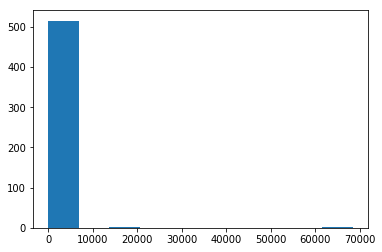

In [60]:
plt.hist(df.bnp.map(int))

Heavily skewed!

(array([  4.,  15.,  52., 102., 147., 119.,  52.,  24.,   2.,   1.]),
 array([ 0.69314718,  1.73719205,  2.78123691,  3.82528178,  4.86932664,
         5.91337151,  6.95741637,  8.00146124,  9.0455061 , 10.08955097,
        11.13359583]),
 <a list of 10 Patch objects>)

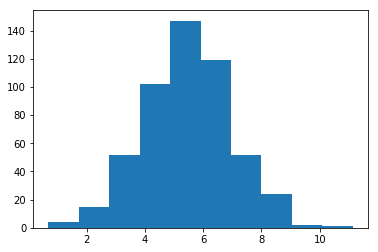

In [61]:
plt.hist(df.bnp.map(np.log))

log plot is much better! Box-Cox?

### this_bnp_change

In [66]:
df.this_bnp_change.value_counts(dropna = False).sort_values(ascending = False)

 0.0       70
NaN        35
-61.0       9
-90.0       8
-687.0      8
 25.0       5
 4.0        5
 21.0       5
-5.0        5
 16.0       5
-9.0        5
 32.0       4
-1.0        4
-6.0        4
 26.0       4
 19.0       4
-142.0      4
 40.0       4
-14.0       4
-59.0       4
-2.0        4
-194.0      3
 8.0        3
 54.0       3
-85.0       3
 36.0       3
 17.0       3
 2.0        3
 41.0       3
-25.0       3
           ..
-805.0      1
 1107.0     1
-423.0      1
 237.0      1
-931.0      1
 263.0      1
 1021.0     1
 259.0      1
-1774.0     1
 610.0      1
-303.0      1
 425.0      1
 395.0      1
 647.0      1
-1062.0     1
 193.0      1
 850.0      1
 310.0      1
-169.0      1
-310.0      1
 161.0      1
 145.0      1
 141.0      1
-229.0      1
-762.0      1
-135.0      1
-193.0      1
 342.0      1
-247.0      1
-68.0       1
Name: this_bnp_change, Length: 256, dtype: int64

In [72]:
df.this_bnp_change.sort_values().head(10)

322   -66618.0
141    -2966.0
140    -2966.0
49     -2600.0
208    -1780.0
207    -1780.0
426    -1774.0
137    -1419.0
83     -1165.0
61     -1112.0
Name: this_bnp_change, dtype: float64

In [73]:
df.this_bnp_change.sort_values(ascending = False).head(10)

50     2580.0
448    1704.0
353    1556.0
352    1556.0
438    1510.0
469    1458.0
500    1439.0
174    1433.0
385    1175.0
35     1169.0
Name: this_bnp_change, dtype: float64

(array([  3.,   0.,   4.,   8.,  46., 319.,  18.,   9.,   4.,   1.]),
 array([-2966. , -2411.4, -1856.8, -1302.2,  -747.6,  -193. ,   361.6,
          916.2,  1470.8,  2025.4,  2580. ]),
 <a list of 10 Patch objects>)

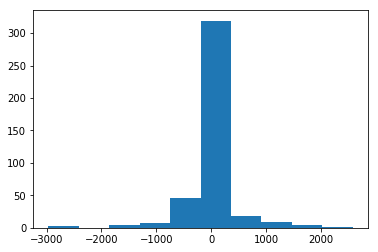

In [75]:
plt.hist(df.this_bnp_change.dropna()[(df.this_bnp_change > -3000)&(df.this_bnp_change != 0)])

### Ace

In [78]:
df.ace.value_counts(dropna = False)

0.0    325
1.0    193
Name: ace, dtype: int64

### bb

In [79]:
df.bb.value_counts(dropna = False)

1.0    353
0.0    165
Name: bb, dtype: int64

### diuretics

In [81]:
df.diuretics.value_counts(dropna = False)

1.0    310
0.0    208
Name: diuretics, dtype: int64

### anticoagulant

In [82]:
df.anticoagulant.value_counts(dropna = False)

1.0    369
0.0    149
Name: anticoagulant, dtype: int64

### ionotropes

In [83]:
df.ionotropes.value_counts(dropna = False)

0.0    465
1.0     53
Name: ionotropes, dtype: int64

### other cardiac meds

In [84]:
df['other cardiac meds'].value_counts(dropna = False)

NaN                                                                                                                                                     217
Atorvastatin 40mg QD                                                                                                                                     19
Diltiazem 30mg Q8H                                                                                                                                       16
Atorvastatin 80mg QD                                                                                                                                     13
Amlodipine 10mg QD                                                                                                                                       11
Amlodipine 5mg QD                                                                                                                                        10
Simvastatin 10mg QD                                             

other cardiac meds column uncleaned?

### bun

In [86]:
df.bun.isna().sum()

11

In [88]:
df.bun.describe()

count     507.0
unique     93.0
top        24.0
freq       34.0
Name: bun, dtype: float64

In [89]:
df.bun

0       63
1      126
2       45
3       45
4       29
5       19
6       19
7       53
8       53
9       50
10      50
11      47
12      30
13      25
14     NaN
15      19
16      77
17      40
18      40
19      93
20      82
21     120
22      30
23      43
24      13
25      49
26      28
27      19
28      18
29      20
      ... 
488      9
489     17
490     16
491     18
492     32
493     13
494     18
495     18
496     21
497     16
498     16
499     69
500     46
501     22
502     10
503     57
504     53
505      9
506     20
507     53
508     26
509     48
510     35
511     99
512     10
513     14
514     48
515     20
516     15
517     38
Name: bun, Length: 518, dtype: object

(array([230., 134.,  68.,  35.,  30.,   7.,   2.,   0.,   0.,   1.]),
 array([  8. ,  27.7,  47.4,  67.1,  86.8, 106.5, 126.2, 145.9, 165.6,
        185.3, 205. ]),
 <a list of 10 Patch objects>)

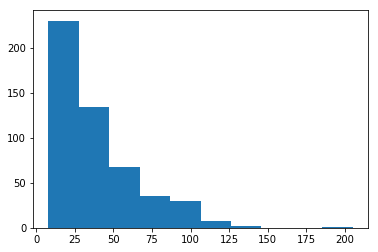

In [92]:
plt.hist(df.bun.dropna().map(int))

Skew.

(array([ 14.,  36.,  90., 113.,  76.,  74.,  45.,  49.,   9.,   1.]),
 array([2.07944154, 2.40379839, 2.72815523, 3.05251207, 3.37686892,
        3.70122576, 4.0255826 , 4.34993945, 4.67429629, 4.99865314,
        5.32300998]),
 <a list of 10 Patch objects>)

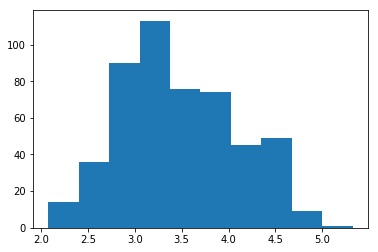

In [93]:
plt.hist(df.bun.dropna().map(int).map(np.log))

Log plot is better. Box-Cox?

### cr

In [98]:
df.cr.map(float).describe()

count    507.000000
mean       1.732130
std        1.540316
min        0.300000
25%        0.800000
50%        1.200000
75%        1.800000
max        9.100000
Name: cr, dtype: float64

(array([250., 145.,  43.,  15.,  22.,  10.,   9.,   4.,   3.,   6.]),
 array([0.3 , 1.18, 2.06, 2.94, 3.82, 4.7 , 5.58, 6.46, 7.34, 8.22, 9.1 ]),
 <a list of 10 Patch objects>)

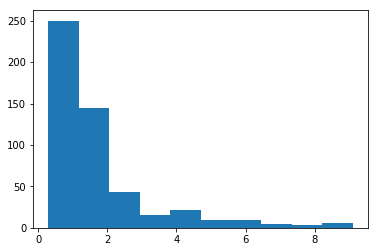

In [101]:
plt.hist(df.cr.dropna().map(float))

Skew!

(array([  5.,  12., 120., 113., 102.,  59.,  34.,  30.,  19.,  13.]),
 array([-1.2039728 , -0.86274808, -0.52152336, -0.18029864,  0.16092608,
         0.5021508 ,  0.84337553,  1.18460025,  1.52582497,  1.86704969,
         2.20827441]),
 <a list of 10 Patch objects>)

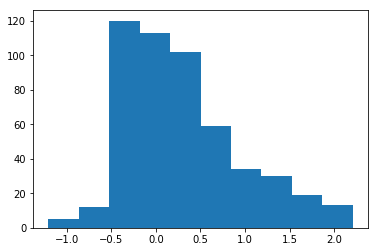

In [102]:
plt.hist(df.cr.dropna().map(float).map(np.log))

Log plot is better but still seems a bit skewed. Box-Cox?

### sodium

In [108]:
df.sodium.dropna().map(int).describe()

count    175.000000
mean     140.251429
std        4.364787
min      121.000000
25%      137.000000
50%      140.000000
75%      142.000000
max      156.000000
Name: sodium, dtype: float64

Format as integer!

In [110]:
df.sodium.isna().sum()

343

Loads of missing! How to impute?

(array([ 1.,  0.,  1.,  8., 52., 50., 49.,  7.,  4.,  3.]),
 array([121. , 124.5, 128. , 131.5, 135. , 138.5, 142. , 145.5, 149. ,
        152.5, 156. ]),
 <a list of 10 Patch objects>)

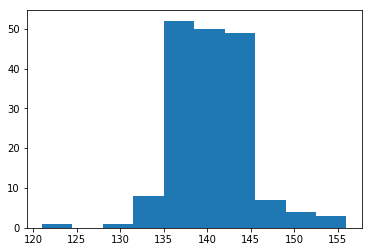

In [111]:
plt.hist(df.sodium.dropna().map(int))

Not bad.

### potasium

In [114]:
df.potasium.map(float).describe()

count    508.000000
mean       4.426969
std        0.635008
min        2.000000
25%        4.000000
50%        4.400000
75%        4.900000
max        7.400000
Name: potasium, dtype: float64

Format as float!

In [116]:
df.potasium.isna().sum()

10

(array([  1.,   2.,  56., 112., 164., 124.,  42.,   4.,   2.,   1.]),
 array([2.  , 2.54, 3.08, 3.62, 4.16, 4.7 , 5.24, 5.78, 6.32, 6.86, 7.4 ]),
 <a list of 10 Patch objects>)

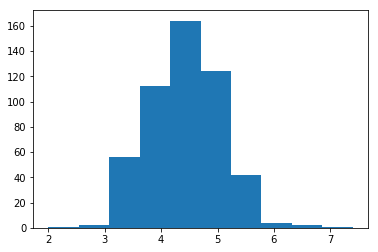

In [118]:
plt.hist(df.potasium.dropna().map(float))

Looks good!

### mg

In [120]:
df.mg.isna().sum()

176

A lot of missing!

(array([  4.,   0.,  10.,  65., 152.,  80.,  20.,   6.,   4.,   1.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ]),
 <a list of 10 Patch objects>)

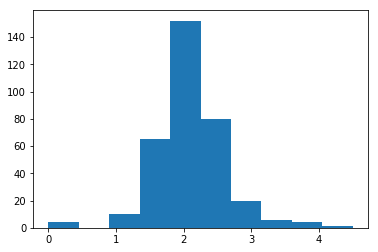

In [122]:
plt.hist(df.mg.dropna().map(float))

Not a bad plot

### this_cr_change

In [ ]:
df.groupby()

In [107]:
df.columns

Index(['patient_link', 'date_of_birth', 'patient_gender', 'ef',
       'special_status', 'facilities_link', 'enrollment_date',
       'hospital_discharged_from', 'admit_weight', 'acute_or_chronic', 'aicd',
       'status', 'discharge', 'discharge_date', 'cardiac_related',
       'create_user', 'enrollId', 'name', 'patient_weight_date', 'weight',
       'this_weight_change', 'weight_change_since_admit', 'bnp_date', 'bnp',
       'this_bnp_change', 'cardiac_meds_date', 'ace', 'bb', 'diuretics',
       'anticoagulant', 'ionotropes', 'other cardiac meds', 'labs_date', 'bun',
       'cr', 'sodium', 'potasium', 'mg', 'this_cr_change', 'bp_date',
       'resting_hr', 'systolic', 'diastolic', 'resting_bp', 'outcome',
       'cad/mi', 'heart failure unspecfied',
       'diastolic heart failure (ef >50%)', 'systolic chf (ef<60%)',
       'atrial fibrilation', 'cardiomyoapthy', 'lvad', 'duration', 'age'],
      dtype='object')

<p><a name="pacemaker"></a></p>
## Pacemaker (aicd)

In [39]:
df.aicd.value_counts(dropna = False)

0                                      457
no                                      18
aicd                                    15
pacemaker                                9
yes                                      4
no aicd or pacemaker                     3
no (ppm only)                            1
lifevest                                 1
aicd-dual chamber                        1
life vest                                1
s/p ppm/aicd                             1
aicd 2014                                1
left chest wall                          1
zoll life vest                           1
no on life vest                          1
ppm mobitz i 2013                        1
zoll lifevest                            1
aicd(turned off), has zoll lifevest      1
Name: aicd, dtype: int64

Unholy mess!!

<p><a name="duration"></a></p>
## Duration

In [19]:
df.duration.describe()

count       518.000000
mean    -148548.571429
std      356127.151677
min     -999999.000000
25%          17.250000
50%          47.000000
75%          99.000000
max        1390.000000
Name: duration, dtype: float64

In [76]:
df.duration[df.duration >0].describe()

count     441.000000
mean      117.376417
std       168.993138
min         1.000000
25%        30.000000
50%        56.000000
75%       133.000000
max      1390.000000
Name: duration, dtype: float64

In [41]:
df.duration.value_counts()

-999999    77
 44        13
 134       12
 29         8
 14         8
 26         8
 47         7
 10         7
 19         6
 48         6
 39         6
 302        6
 56         6
 24         6
 17         6
 30         5
 33         5
 20         5
 23         5
 57         5
 27         5
 15         5
 37         5
 36         5
 68         5
 49         5
 34         5
 98         4
 81         4
 70         4
           ..
 92         1
 93         1
 94         1
 96         1
 115        1
 110        1
 827        1
 109        1
 79         1
 138        1
 140        1
 76         1
 231        1
 230        1
 222        1
 217        1
 211        1
 209        1
 201        1
 191        1
 1204       1
 169        1
 167        1
 162        1
 160        1
 152        1
 149        1
 145        1
 75         1
 904        1
Name: duration, Length: 174, dtype: int64

77 missing durations.

In [24]:
df.duration[df.duration > 0].describe()

count     441.000000
mean      117.376417
std       168.993138
min         1.000000
25%        30.000000
50%        56.000000
75%       133.000000
max      1390.000000
Name: duration, dtype: float64

In [28]:
df.duration[df.duration > 0].sort_values(ascending = False).head(10)

361    1390
4      1276
153    1204
337     904
466     827
444     773
339     760
359     723
0       694
351     664
Name: duration, dtype: int64

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(array([296.,  56.,  38.,  26.,   5.,   6.,   4.,   3.,   2.,   2.]),
 array([  1. ,  91.3, 181.6, 271.9, 362.2, 452.5, 542.8, 633.1, 723.4,
        813.7, 904. ]),
 <a list of 10 Patch objects>)

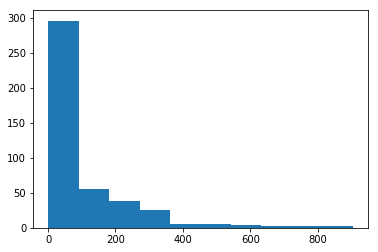

In [31]:
plt.hist(df.duration[(df.duration > 0)&(df.duration < 1000)])

Plot is heavily skewed.

(array([29., 38., 46., 40., 45., 33., 27., 17., 20., 18.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

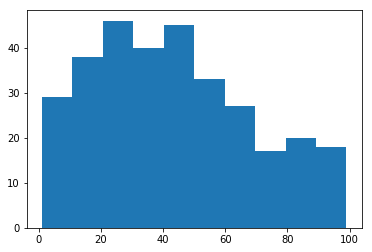

In [32]:
plt.hist(df.duration[(df.duration > 0)&(df.duration < 100)])

In [42]:
import numpy as np

(array([  4.,   7.,  10.,  35.,  88., 126.,  78.,  63.,  21.,   9.]),
 array([0.        , 0.7237059 , 1.44741181, 2.17111771, 2.89482361,
        3.61852951, 4.34223542, 5.06594132, 5.78964722, 6.51335312,
        7.23705903]),
 <a list of 10 Patch objects>)

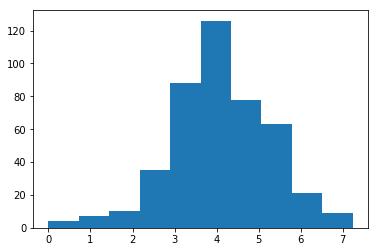

In [44]:
plt.hist(df.duration[df.duration > 0].map(np.log))

Log histogram of non-missing values looks much more normal. Box-Cox transformation may be appropriate here.